Bibliotecas usadas 


In [230]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score




warnings.filterwarnings('ignore')

Escolha uma base de dados de classificação. O Scikit-learn e o UCI Repository possuem algumas bases. Caso algum dado seja categórico, transforme para númerico.

In [231]:
cancer_df  = pd.read_csv(r'C:\Users\Rícharde\Documents\Dell lead\Atividade 02\data.csv')

In [232]:
cancer_df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [233]:
label_enconder = preprocessing.LabelEncoder()
cancer_df.diagnosis = label_enconder.fit_transform(cancer_df.diagnosis)

Separação dos dados

In [234]:
list_drop = ['diagnosis', 'Unnamed: 32' , 'id']
X = cancer_df.drop(list_drop, axis=1)
y = cancer_df.diagnosis

Realize uma Análise Exploratória dos Dados no conjunto de dados selecionado.


In [235]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int32  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [236]:
cancer_df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Proporção dos dados de diagnostico

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

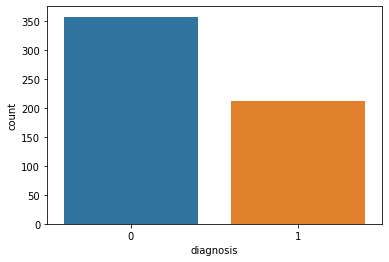

In [237]:
sns.countplot(cancer_df.diagnosis,label="count")

Podemos observar que temos um desbalanceamento na quantidade de diagnosticos. A quantidade de tumores benignos é quase o dobro da quantidade de malignos

Distribuição de frenquência de cada feature

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'diagnosis'}>,
        <AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>],
       [<AxesSubplot:title={'center':'smoothness_mean'}>,
        <AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>],
       [<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>],
  

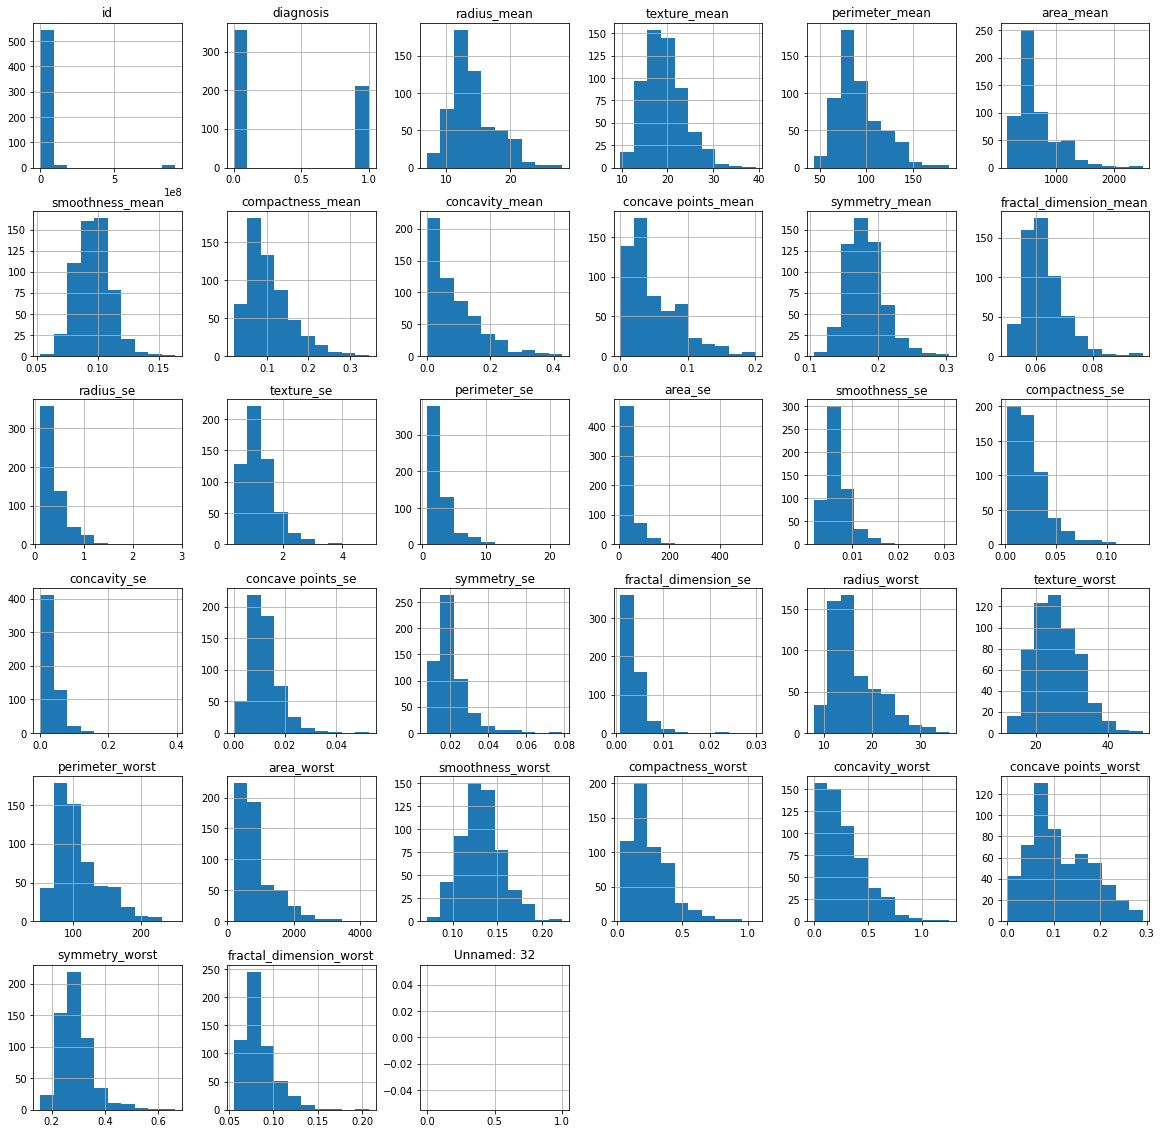

In [238]:
cancer_df.hist(figsize=(20,20))

Observadndo a distribuição dos dados temos que a grande quantidade das informações estão distribuídas ao lado esquerdo do gráfico. Dessa forma, a grande quantidade dos dados encontram-se abaixo do valor da média  

In [239]:
def standardization(X):
    return (X-X.mean())/(X.std())


Correlação entre as features e ser benigno ou maligno

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

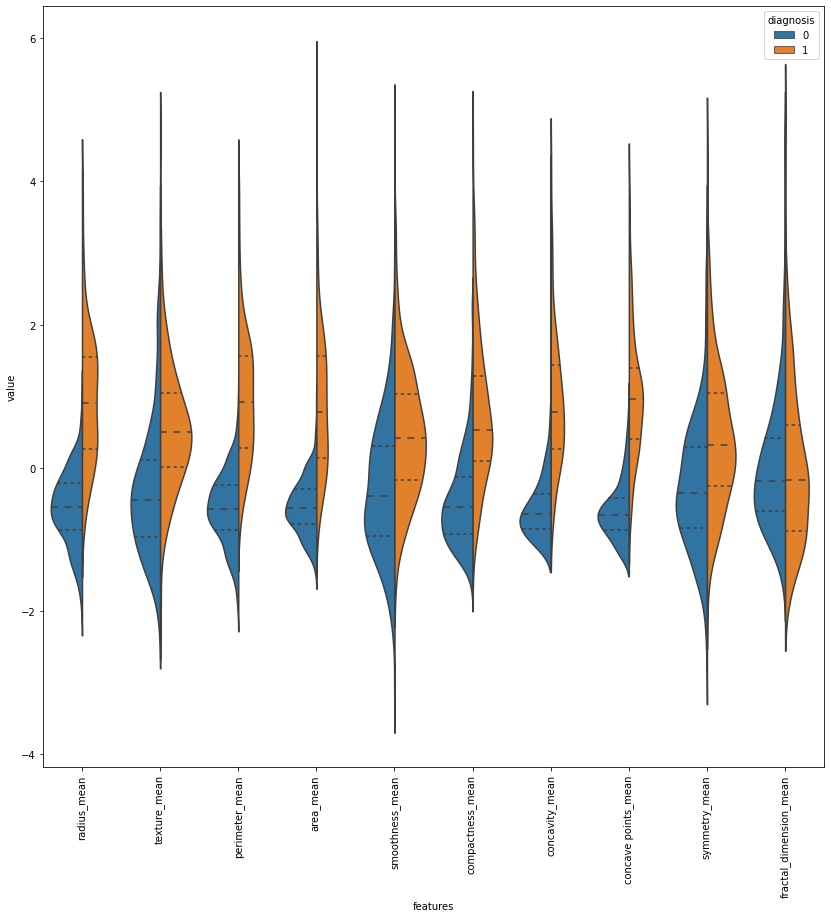

In [240]:
data_y = y
data   = X 
data_std = standardization(data)
data = pd.concat([y,data_std.iloc[:,0:10]], axis=1)
data = pd.melt(data, id_vars = "diagnosis" , var_name="features" , value_name="value")
plt.figure(figsize=(14,14))
sns.violinplot(x="features" , y="value" , hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Nesse gráfico podemos analisar quanto de cada label tem de relação com cada feature. Por exemplo, na feature 'texture_mean' temos que as médias de maligno e benigno estão bem separadas o que nos ajudará no processo de classificação. Diferente da 'fractal_dimension_mean' que tem médias de maligno é benigno bem próximas.   

Divida os dados em treino/teste utilizando a técnica hold-out. Escolha uma porcentagem para treino/teste (mais utilizadas: 90/10, 80/20, 75/25, 70/30, 50/50).


In [241]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,shuffle=True,random_state=42)

In [242]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [243]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [244]:
y_pred = knn_model.predict(X_test)

Calcule algumas métricas. Obrigatório: acurácia. Exemplo de outras métricas: recall, precision, F1-Score. Utilize o Scikit-Learn (classification_report, accuracy_score, f1_score, etc)

In [245]:
acc_scr = accuracy_score(y_test,y_pred)
f1_scr  = f1_score(y_test,y_pred,average='binary')
avg_pre_scr = average_precision_score(y_test,y_pred,average='samples')
recall_scr = recall_score(y_test,y_pred)

In [246]:
metrics_name = ['accuracy_score','f1_score','aver_precis_score','recall_score']
result = [acc_scr,f1_scr,avg_pre_scr,recall_scr]

[0.9144736842105263, 0.8862973760932944, 0.8170335221349267, 0.9156626506024096]


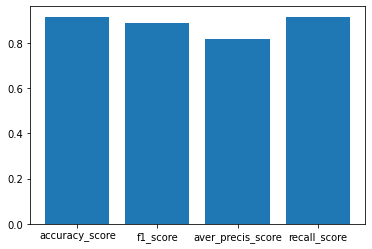

In [247]:
plt.bar(metrics_name,result)
print(result)

Plot a matriz de confusão 


In [248]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [249]:
conf_matrix

array([[265,  25],
       [ 14, 152]], dtype=int64)

<AxesSubplot:>

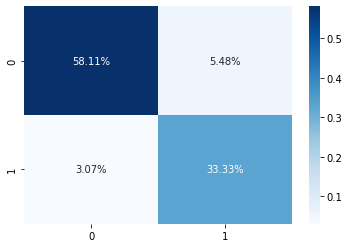

In [250]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')

Realize vários experimentos, modificando a quantidade de vizinhos (parametro n_neighbors), e crie um plot (k vs acurácia).


In [251]:
accuracy_test_values  = []
accuracy_train_values = []
N_neighbors = 1
while N_neighbors <= 50:
    knn_model = KNeighborsClassifier(n_neighbors=N_neighbors)
    knn_model.fit(X_train,y_train)
    y_pred_train = knn_model.predict(X_train)
    y_pred_test  = knn_model.predict(X_test)
    acc_train = accuracy_score(y_train,y_pred_train)
    acc_test  = accuracy_score(y_test,y_pred_test)
    accuracy_train_values.append(acc_train)
    accuracy_test_values.append(acc_test)
    N_neighbors += 1

In [252]:
def to_por_cent(data):
    return list(map(lambda x:x*100,data))

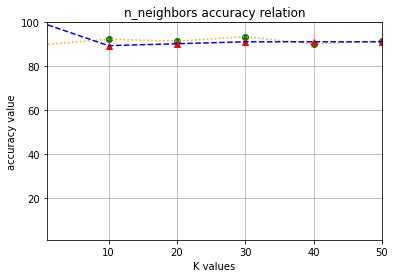

In [253]:
x = 10*np.array(range(50))
plt.plot( x, to_por_cent(accuracy_test_values), 'go')  
plt.plot( x, to_por_cent(accuracy_test_values), 'k:', color='orange')   
plt.plot( x, to_por_cent(accuracy_train_values), 'r^')  
plt.plot( x, to_por_cent(accuracy_train_values), 'k--', color='blue')   
plt.axis([1, 50, 1,100])
plt.title("n_neighbors accuracy relation")
plt.grid(True)
plt.xlabel("K values")
plt.ylabel("accuracy value")
plt.show()

Discuta os resultados encontrados

Segunda a análise do gráfico vemos que valores pequenos prejudicam o desempenho do modelo. No conjunto de treino vemos que um valor muito pequeno em K gera claramente um overfit. De maneira contrária, vemos que valores muito pequenos em K no conjunto de teste não gera necessariamente um overfit, mas não produzem resultados interesantes. Por fim, vemos que valores mais altos em K geram um crescimento no desempenho do modelo, mas acima de k=10 o desempenho do algoritmo tende a estabilizar. 

Utilize a técnica k-fold e discuta os resultados, comparando com a técnica hold-out.


In [254]:
KF = KFold(n_splits=10, random_state=42, shuffle=True)

In [255]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [256]:
cross_val = cross_val_score(knn_model,X,y,cv=KF, scoring='accuracy')

In [257]:
cross_val 

array([0.96491228, 0.92982456, 0.96491228, 1.        , 0.87719298,
       0.89473684, 0.96491228, 0.9122807 , 0.9122807 , 0.85714286])

Accuracy score with Cross Validation

In [258]:
cross_val.sum()/len(cross_val)

0.9278195488721804

Without Cross Validation

In [259]:
acc_scr

0.9144736842105263

# Realize uma combinação de técnicas ( exemplos: hold out + kfold, dois k-fold, entre outros) e compare os resultados com as demais questões.

Nested using cross_val_score

In [265]:
cross_inner = KFold(n_splits=3, shuffle=True, random_state=42)
cross_outer = KFold(n_splits=5,shuffle=True,random_state=42)
knn_model   = KNeighborsClassifier(n_neighbors=3)

In [268]:
result = []
hiper = dict()
hiper['n_neighbors'] = [10,25,35,45,50]

gcv = GridSearchCV(knn_model,param_grid=hiper, cv=cross_inner,n_jobs=-1)
score_train = cross_val_score(gcv,X,y,cv=cross_outer,scoring='accuracy')
result.append(score_train)

In [274]:
result

[array([0.96491228, 0.98245614, 0.87719298, 0.92982456, 0.92035398])]